In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
# Read dataset
df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
# df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")


In [4]:
print(f"Initial columns: {df.columns.tolist()}\n")

df["score_difference"] = df["lebron_team_score"] - df["opponent_team_score"]
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    # "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    # "top",
    # "left",
    "shot_type",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   top  left time_remaining  result  distance_ft  score_difference
0  310   203          09:26   False           26                 0
1  213   259          08:38   False           16                -1
2  143   171          08:10   False           11                -3
3   68   215          05:24    True            3                -7
4   66   470          01:02   False           23                -1


In [5]:
# convert time to numerical
minutes = df["time_remaining"].str.split(":", expand=True)[0].astype(int)
seconds = df["time_remaining"].str.split(":", expand=True)[1].astype(int)
df["time_remaining"] = minutes * 60 + seconds

In [6]:
layup_data = df[df["distance_ft"] <= 5]
midrange_data = df[(df["distance_ft"] > 5) & (df["distance_ft"] < 22)]
three_data = df[df["distance_ft"] >= 22]

layup_data = layup_data.drop(["distance_ft"], axis=1)
midrange_data = midrange_data.drop(["distance_ft"], axis=1)
three_data = three_data.drop(["distance_ft"], axis=1)

print(f"Layup data:\n{layup_data.head()}")

Layup data:
    top  left  time_remaining  result  score_difference
3    68   215             324    True                -7
5    63   239             690    True                -1
7    53   224             605    True                -1
10   62   224             426   False                -8
11   63   249             233    True               -10


In [7]:
# Split data
layup_X = layup_data.drop(columns=["result"])
layup_y = layup_data.result.astype("int")
layup_X_train, layup_X_test, layup_y_train, layup_y_test = train_test_split(
    layup_X, layup_y, test_size=0.25, random_state=16
)

midrange_X = midrange_data.drop(columns=["result"])
midrange_y = midrange_data.result.astype("int")
midrange_X_train, midrange_X_test, midrange_y_train, midrange_y_test = train_test_split(
    midrange_X, midrange_y, test_size=0.25, random_state=16
)

three_X = three_data.drop(columns=["result"])
three_y = three_data.result.astype("int")
three_X_train, three_X_test, three_y_train, three_y_test = train_test_split(
    three_X, three_y, test_size=0.25, random_state=16
)


In [8]:
# Initialize models

layup_logreg = LogisticRegression(random_state=16, solver="liblinear")
layup_logreg.fit(layup_X_train, layup_y_train)
layup_y_pred = layup_logreg.predict(layup_X_test)

midrange_logreg = LogisticRegression(random_state=16, solver="lbfgs")
midrange_logreg.fit(midrange_X_train, midrange_y_train)
midrange_y_pred = midrange_logreg.predict(midrange_X_test)

three_logreg = LogisticRegression(random_state=16, solver="lbfgs")
three_logreg.fit(three_X_train, three_y_train)
three_y_pred = three_logreg.predict(three_X_test)

Confusion matrix: [[  4  31]
 [  3 124]]


Text(0.5, 427.9555555555555, 'Predicted label')

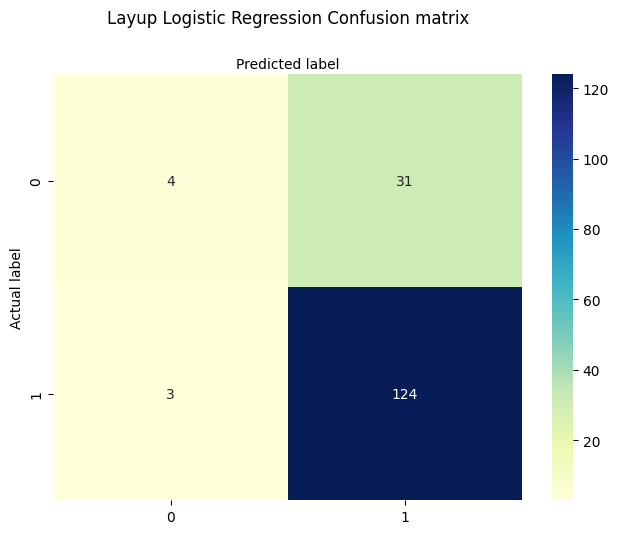

In [9]:
layup_cnf_matrix = metrics.confusion_matrix(layup_y_test, layup_y_pred)
print(f"Confusion matrix: {layup_cnf_matrix}")

class_names = layup_y.unique()
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(layup_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Layup Logistic Regression Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


Confusion matrix: [[47  0]
 [48  0]]


Text(0.5, 427.9555555555555, 'Predicted label')

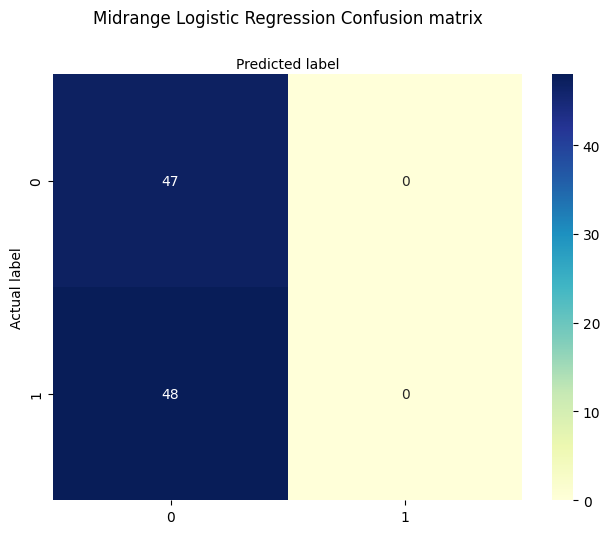

In [10]:
midrange_cnf_matrix = metrics.confusion_matrix(midrange_y_test, midrange_y_pred)
print(f"Confusion matrix: {midrange_cnf_matrix}")

class_names = midrange_y.unique()
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(midrange_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Midrange Logistic Regression Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")


Confusion matrix: [[83  4]
 [38  3]]


Text(0.5, 427.9555555555555, 'Predicted label')

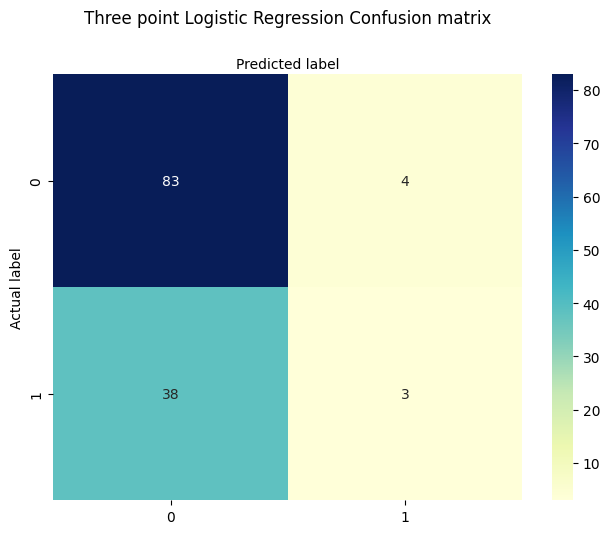

In [11]:
three_cnf_matrix = metrics.confusion_matrix(three_y_test, three_y_pred)
print(f"Confusion matrix: {three_cnf_matrix}")

class_names = three_y.unique()
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(three_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Three point Logistic Regression Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [12]:
# Show metrics
target_names = ["Shot Miss", "Shot Make"]
print(classification_report(layup_y_test, layup_y_pred, target_names=target_names))

print(classification_report(midrange_y_test, midrange_y_pred, target_names=target_names))

print(classification_report(three_y_test, three_y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Shot Miss       0.57      0.11      0.19        35
   Shot Make       0.80      0.98      0.88       127

    accuracy                           0.79       162
   macro avg       0.69      0.55      0.53       162
weighted avg       0.75      0.79      0.73       162

              precision    recall  f1-score   support

   Shot Miss       0.49      1.00      0.66        47
   Shot Make       0.00      0.00      0.00        48

    accuracy                           0.49        95
   macro avg       0.25      0.50      0.33        95
weighted avg       0.24      0.49      0.33        95

              precision    recall  f1-score   support

   Shot Miss       0.69      0.95      0.80        87
   Shot Make       0.43      0.07      0.12        41

    accuracy                           0.67       128
   macro avg       0.56      0.51      0.46       128
weighted avg       0.60      0.67      0.58       128



/home/kieran/VSCODE/Git/NBA-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kieran/VSCODE/Git/NBA-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kieran/VSCODE/Git/NBA-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [13]:
scores = cross_val_score(layup_logreg, layup_X, layup_y, cv=5, scoring="accuracy")
print(f"Cross-validation accuracy: {scores.mean():.3f}")

Cross-validation accuracy: 0.713


In [14]:
y_pred_prob = layup_logreg.predict_proba(layup_X_test)[:, 1]
rmse = np.sqrt(mean_squared_error(layup_y_test, y_pred_prob))
print(f"Layup RMSE: {rmse:.4f}")

y_pred_prob = midrange_logreg.predict_proba(midrange_X_test)[:, 1]
rmse = np.sqrt(mean_squared_error(midrange_y_test, y_pred_prob))
print(f"Midrange RMSE: {rmse:.4f}")

y_pred_prob = three_logreg.predict_proba(three_X_test)[:, 1]
rmse = np.sqrt(mean_squared_error(three_y_test, y_pred_prob))
print(f"Three RMSE: {rmse:.4f}")

Layup RMSE: 0.4117
Midrange RMSE: 0.5186
Three RMSE: 0.4772


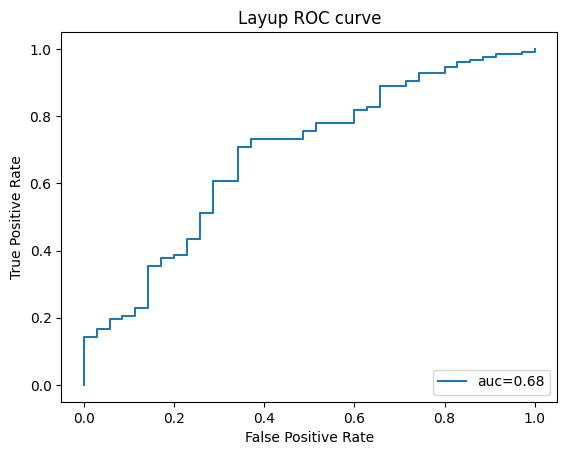

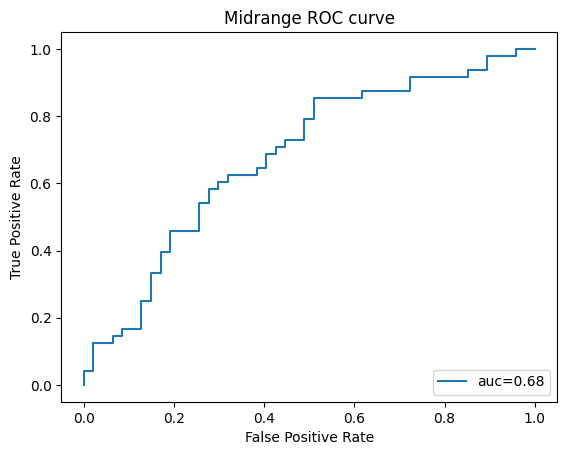

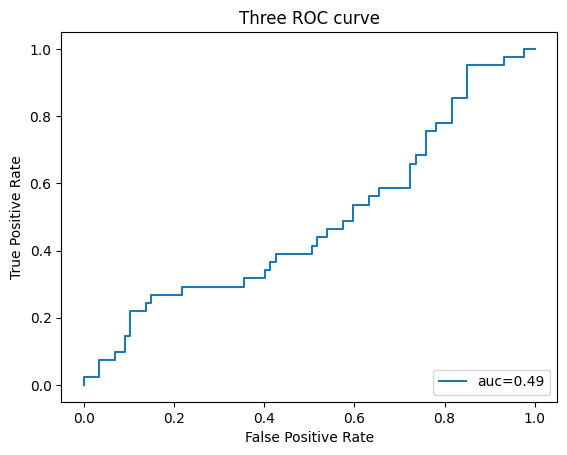

In [15]:
# ROC curve
y_pred_proba = layup_logreg.predict_proba(layup_X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(layup_y_test, y_pred_proba)
auc = metrics.roc_auc_score(layup_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc=" + str(round(auc, 2)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Layup ROC curve")
plt.show()

# ROC curve
y_pred_proba = midrange_logreg.predict_proba(midrange_X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(midrange_y_test, y_pred_proba)
auc = metrics.roc_auc_score(midrange_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc=" + str(round(auc, 2)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Midrange ROC curve")
plt.show()

# ROC curve
y_pred_proba = three_logreg.predict_proba(three_X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(three_y_test, y_pred_proba)
auc = metrics.roc_auc_score(three_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc=" + str(round(auc, 2)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Three ROC curve")
plt.show()

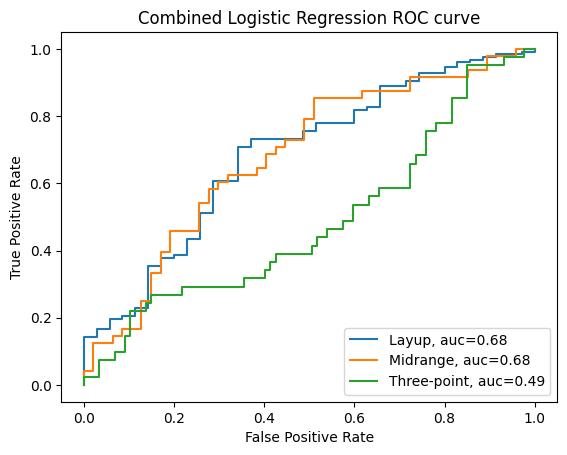

In [16]:
# ROC curve
y_pred_proba = layup_logreg.predict_proba(layup_X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(layup_y_test, y_pred_proba)
auc = metrics.roc_auc_score(layup_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Layup, auc=" + str(round(auc, 2)))


# ROC curve
y_pred_proba = midrange_logreg.predict_proba(midrange_X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(midrange_y_test, y_pred_proba)
auc = metrics.roc_auc_score(midrange_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Midrange, auc=" + str(round(auc, 2)))

# ROC curve
y_pred_proba = three_logreg.predict_proba(three_X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(three_y_test, y_pred_proba)
auc = metrics.roc_auc_score(three_y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Three-point, auc=" + str(round(auc, 2)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined Logistic Regression ROC curve")
plt.show()